<a href="https://colab.research.google.com/github/paulzl/Assignment_session03_paulzl/blob/main/AIA23_GraphML_S1_Intro_to_Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GraphML - Session 1

In this session you will learn about the basic concepts of graphs and networks by exploring the networkX library for python.

**NetworkX** is a Python language software package for the creation, manipulation, and study of the structure, dynamics, and function of complex networks.

With networkX you can load and store networks in standard and nonstandard data formats, generate many types of random and classic networks, analyze network structure, build network models, design new network algorithms, draw networks, and much more.

This course and notebook is based and inspired on the book Graph Machine 
Learning by Claudio Stamile, Aldo Marzullo, Enrico Deusebio

NetworkX references:

tutorial: https://networkx.org/documentation/stable/tutorial.html

reference: https://networkx.org/documentation/stable/reference/index.html

## Importing networkx
First thing we need to do is import the networkx module:

In [ ]:
import networkx as nx

## Graph Basics
Now, let's build some graphs with it:

Definition:

*A simple undirected graph (or simply, a graph) G is defined as a couple G=(V,E) , where V={v1, .., vn} is a set of nodes (also called vertices) and E={{vk,vw } .., {vi,vj}} is a set of two-sets (set of two elements) of edges (also called links), representing the connection between two nodes belonging to V.*

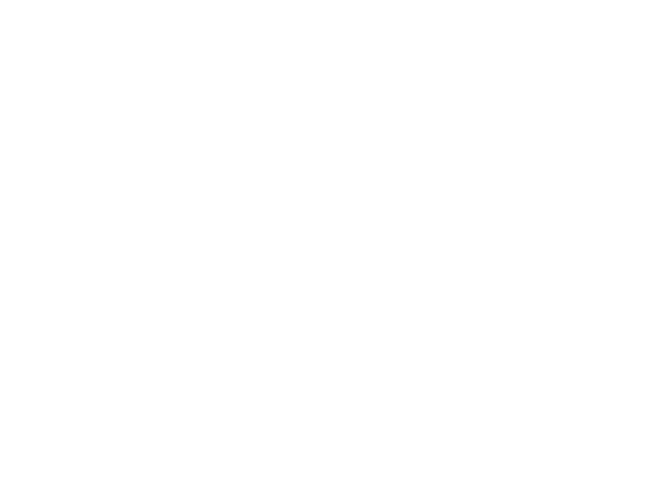

In [ ]:
G = nx.Graph() #empty graph
nx.draw(G) #draw the graph

In [ ]:
G

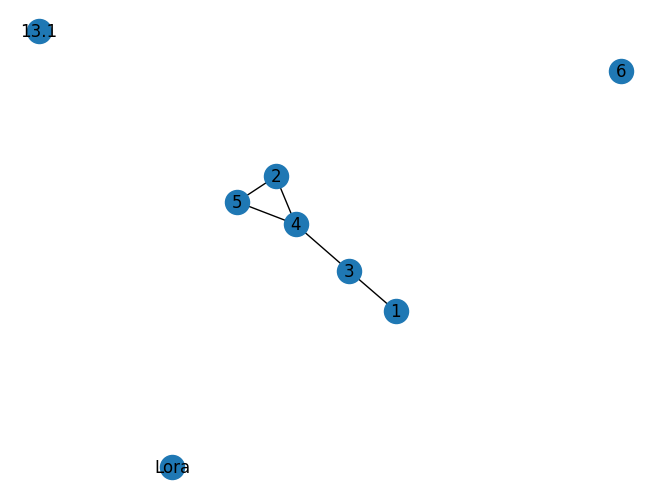

In [ ]:
V = [ 1, 2 ,3, 4, 5, "Lora"]
G.add_nodes_from(V)
nx.draw(G, with_labels=True)

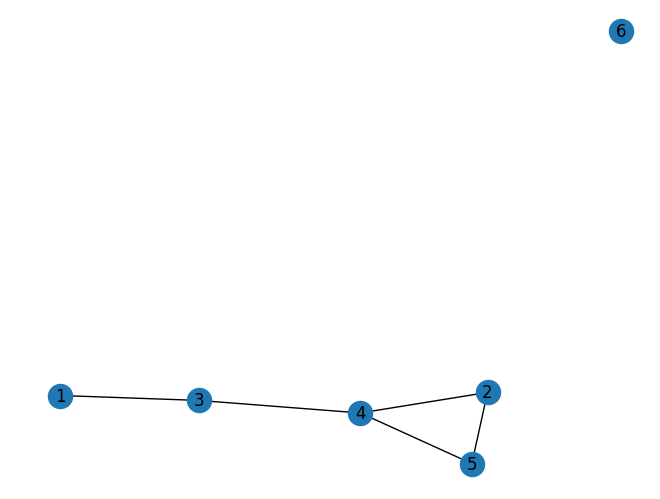

In [ ]:
E = [(1,3) , (4,3) , (4,5), (5,2), (2,4)  ]
G.add_edges_from(E)
nx.draw(G, with_labels=True)

Let's make another example:

In [ ]:
G = nx.Graph()
V = ['Dublin', 'Paris', 'Milan', 'Rome']
E = [('Milan','Dublin'), ('Milan','Paris'), ('Paris','Dublin'), ('Milan','Rome')]

G.add_nodes_from(V)
G.add_edges_from(E)


In [ ]:
#query the nodes
G.nodes

NodeView(('Dublin', 'Paris', 'Milan', 'Rome'))

In [ ]:
#query the nodes
G.edges

EdgeView([('Dublin', 'Milan'), ('Dublin', 'Paris'), ('Paris', 'Milan'), ('Milan', 'Rome')])

In [ ]:
#iterate through the nodes
for n in G.nodes:
  print(f"The city is {n}") #string formatting

The city is Dublin
The city is Paris
The city is Milan
The city is Rome


In [ ]:
#string formatting
name = "David"
print(f"Hi, my name is {name}")

Hi, my name is David


### Basic Metrics

The order of a graph is the number of its vertices |V|.

In [ ]:
print(f"Graph Order: {G.number_of_nodes()}")

Graph Order: 4


The size of a graph is the number of its edges |E|. 


In [ ]:
print(f"Graph Size: {G.number_of_edges()}")

Graph Size: 4


The degree of a vertex is the number of edges that are adjacent to it.

In [ ]:
print(f"Degree for nodes: { {v: G.degree(v) for v in G.nodes} }")

Degree for nodes: {'Dublin': 2, 'Paris': 2, 'Milan': 3, 'Rome': 1}


The neighbors of a vertex v in a graph G is a subset of vertex V′ induced by all vertices adjacent to v.

In [ ]:
print(f"Neighbors for nodes: { {v: list(G.neighbors(v)) for v in G.nodes} }")

Neighbors for nodes: {'Dublin': ['Milan', 'Paris'], 'Paris': ['Milan', 'Dublin'], 'Milan': ['Dublin', 'Paris', 'Rome'], 'Rome': ['Milan']}


In [ ]:
ego_graph_milan = nx.ego_graph(G, "Milan")
ego_graph_milan.edges

EdgeView([('Dublin', 'Milan'), ('Dublin', 'Paris'), ('Paris', 'Milan'), ('Milan', 'Rome')])

## Basic graph visualization with matplotlib

Reference:

https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html

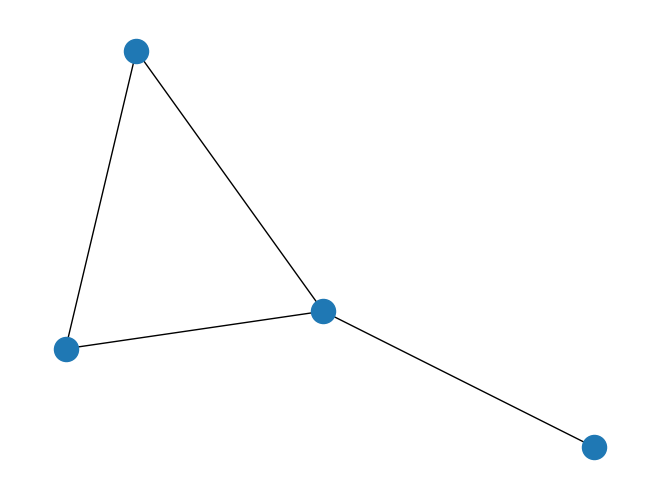

In [ ]:
nx.draw(G)

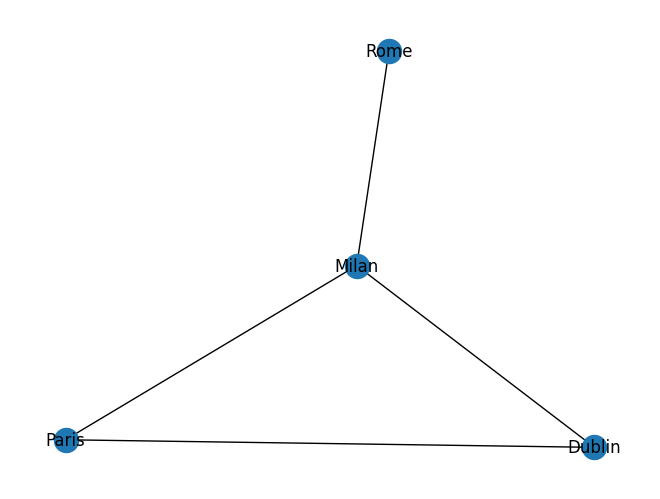

In [ ]:
nx.draw(G, with_labels=True)


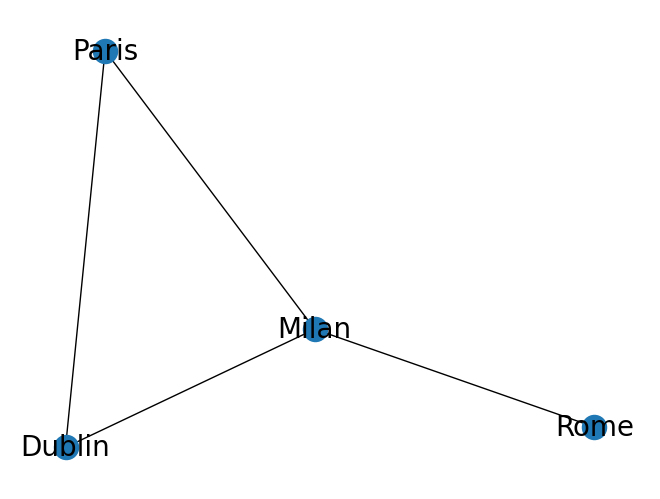

In [ ]:
nx.draw(G, with_labels=True, font_size=20 )

Layouts

https://networkx.org/documentation/stable/reference/drawing.html#module-networkx.drawing.layout

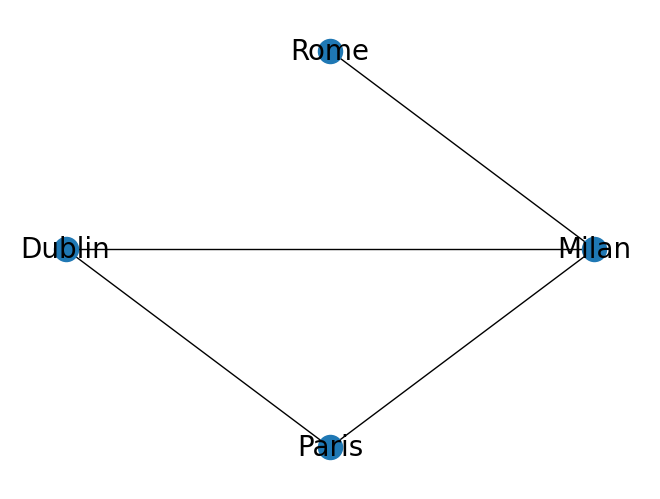

In [ ]:
pos = nx.shell_layout(G)
nx.draw(G, pos, with_labels=True, font_size=20 )


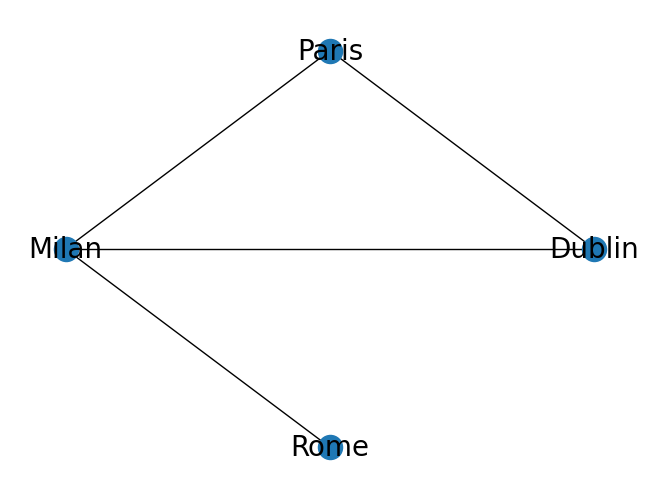

In [ ]:
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, font_size=20 )


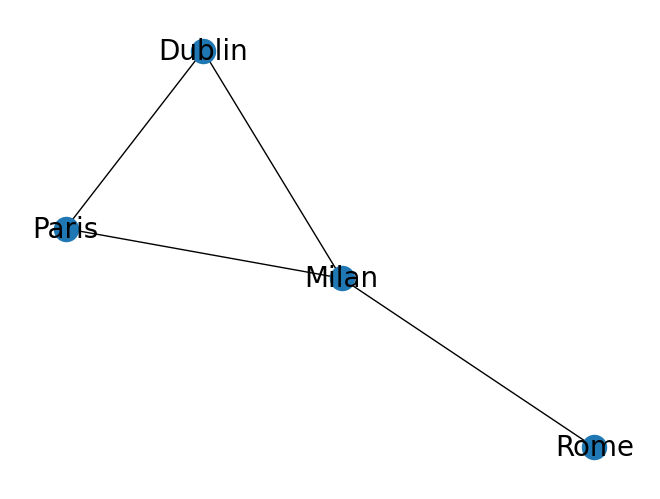

In [ ]:
pos = nx.spring_layout(G, seed=1)
nx.draw(G, pos, with_labels=True, font_size=20 )

{'Dublin': Text(-0.33430591614064764, 0.7353525036990713, 'Dublin'),
 'Paris': Text(-0.8035117976694399, 0.08291928822112611, 'Paris'),
 'Milan': Text(0.1378177138100876, -0.09911393734050053, 'Milan'),
 'Rome': Text(1.0, -0.719157854579697, 'Rome')}

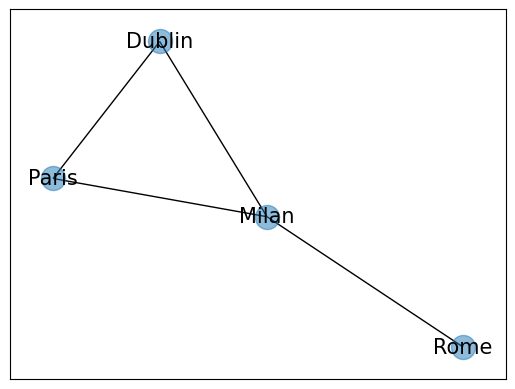

In [ ]:
nx.draw_networkx_nodes(G, pos, alpha= 0.5)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=15 )

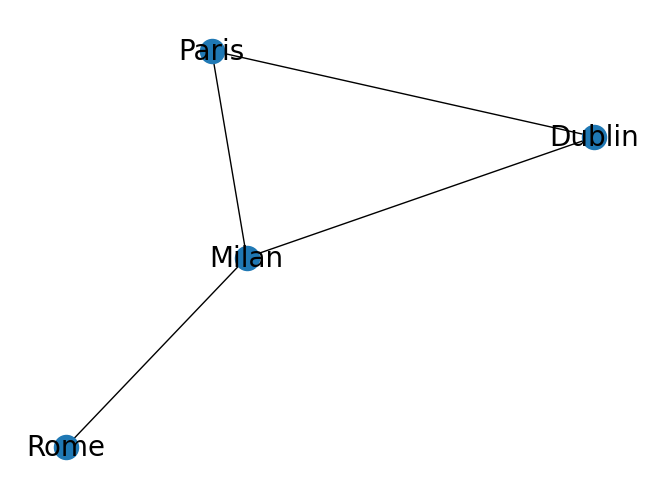

In [ ]:
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True, font_size=20 )


In [ ]:
def drawGraph(G, pos=nx.kamada_kawai_layout(G) ):
  nx.draw_networkx_nodes(G, pos, alpha= 0.5)
  nx.draw_networkx_edges(G, pos) 
  nx.draw_networkx_labels(G, pos, font_size=15 )

## Graph modification

Adding nodes to graphs

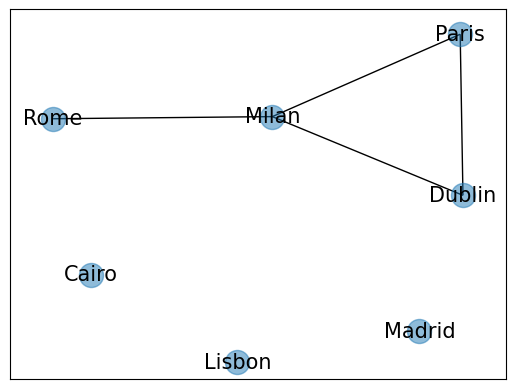

In [ ]:
# basic add nodes
G.add_node('Cairo') #this is how you add nodes to graphs
G.add_nodes_from( ['Lisbon', 'Madrid'] ) #nodes can me named anything

drawGraph(G)

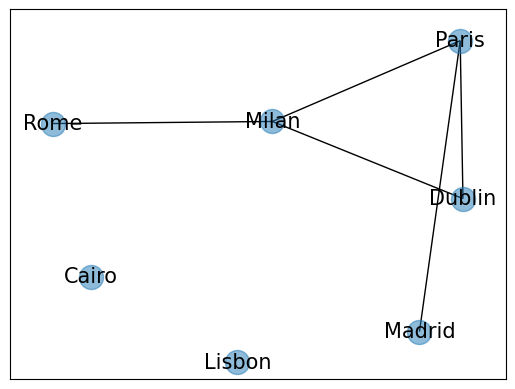

In [ ]:
G.add_edge('Paris','Madrid')
drawGraph(G)


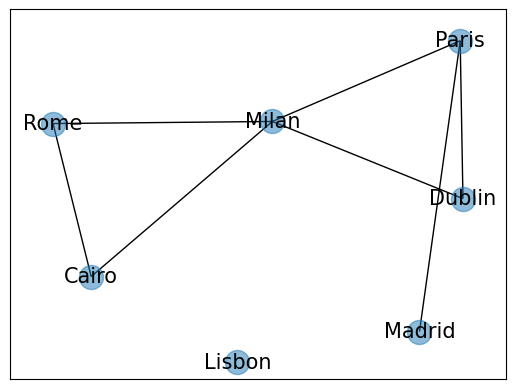

In [ ]:
new_edges = [('Rome','Cairo'), ('Cairo','Milan') ]
G.add_edges_from( new_edges )
drawGraph(G)

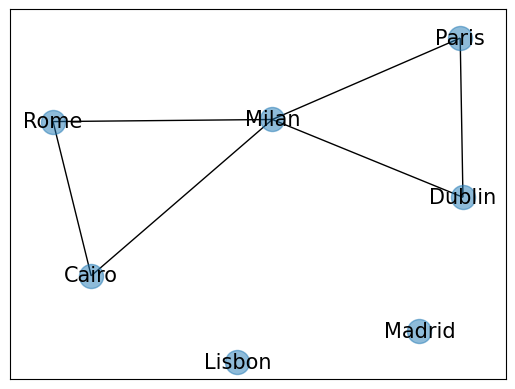

In [ ]:
G.remove_edge('Paris','Madrid' )
#G.remove_edges_from(new_edges)
drawGraph(G)

remove nodes

In [ ]:
#G.remove_node('Cairo')
G.remove_nodes_from(['Lisbon', 'Madrid'] )
drawGraph(G)

## Graph Types

### DiGraphs

A digraph G is defined as a couple G=(V, E), where V={v1, .., vn} is a set of nodes and 
E={(vk,vw ) .., (vi,vj)} is a set of ordered couples representing the connection between 
two nodes belonging to V.

In [ ]:
DG = nx.DiGraph() #initializes a Directed Graph
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [ ('Milan','Dublin'), ('Paris','Milan'), ('Paris','Dublin'), ('Rome', 'Milan')]
DG.add_nodes_from(V)
DG.add_edges_from(E)

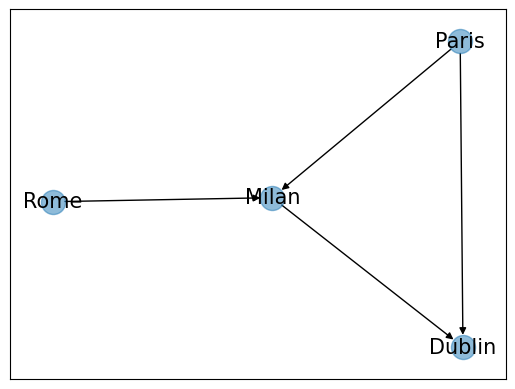

In [ ]:
drawGraph(DG)

Indegree and outdegree
For a vertex v, the number of head ends adjacent to v is called the indegree
(indicated by −( ) of v, while the number of tail ends adjacent to v is its 
outdegree (indicated by +( ))

In [ ]:
print(f"Indegree for nodes: { {v: DG.in_degree(v) for v in DG.nodes} }")


Indegree for nodes: {'Rome': 0, 'Dublin': 2, 'Paris': 0, 'Milan': 2}


In [ ]:
print(f"Outdegree for nodes: { {v: DG.out_degree(v) for v in DG.nodes} }")

Outdegree for nodes: {'Rome': 1, 'Dublin': 0, 'Paris': 2, 'Milan': 1}


### Multigraph



In [ ]:
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [
    ('Milan','Dublin'), 
    ('Dublin', 'Milan'), 
    ('Paris','Milan'), 
    ('Paris','Dublin'), 
    ('Rome', 'Milan'), 
    ('Milan','Rome')
    ]

Directed multi-graph

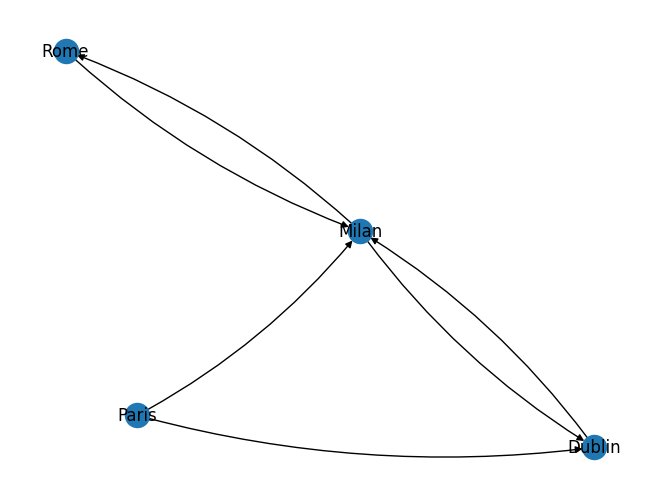

In [ ]:
DMG  = nx.MultiDiGraph()
DMG.add_nodes_from(V)
DMG.add_edges_from(E)

pos = nx.spring_layout(DMG)
nx.draw(DMG, pos, with_labels=True, connectionstyle='arc3, rad = 0.1', arrows = True)


### Weighted Graphs

In [ ]:
import matplotlib.pyplot as plt

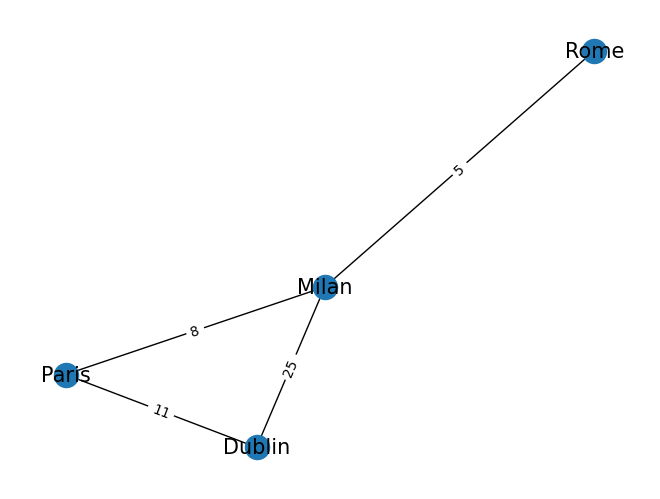

In [ ]:
WG = nx.Graph()
V = {'Dublin', 'Paris', 'Milan', 'Rome'}

E = [ ('Milan','Dublin', 25), ('Paris','Milan', 8), ('Paris','Dublin', 11), ('Milan','Rome', 5) ]

WG.add_nodes_from(V)
WG.add_weighted_edges_from(E) #adds weighted edges

pos = nx.spring_layout(WG, seed=0)
nx.draw(WG, pos)
labels = nx.get_edge_attributes(WG,'weight')

nx.draw_networkx_labels(WG, pos, font_size=15 )
nx.draw_networkx_edge_labels(WG,pos,edge_labels=labels)

plt.show()

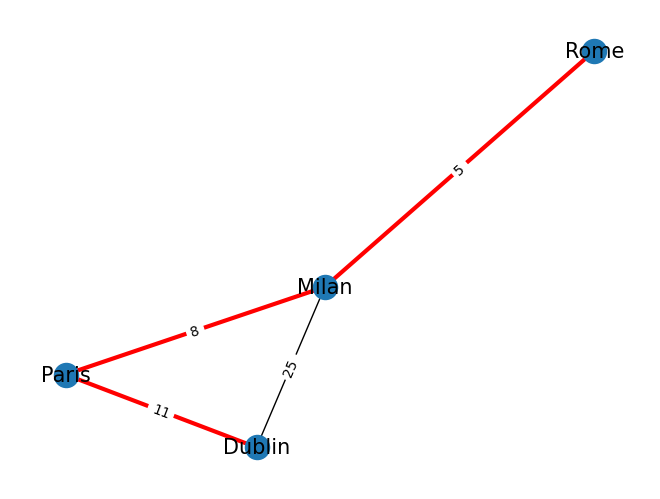

In [ ]:
#calculate dijstra path

source = 'Rome' 
target = 'Dublin' 

sp = nx.dijkstra_path(WG, source, target)

edgelist = [[sp[i], sp[i+1]] for i in range(len(sp)-1)]

nx.draw(WG, pos)
nx.draw_networkx_edges(WG, pos, edgelist, edge_color='r', width=3.)
labels = nx.get_edge_attributes(WG, 'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
nx.draw_networkx_labels(WG, pos, font_size=15 )
plt.show()

In [ ]:
weights = nx.get_edge_attributes(WG, 'weight')
weights

{('Rome', 'Milan'): 5,
 ('Dublin', 'Milan'): 25,
 ('Dublin', 'Paris'): 11,
 ('Paris', 'Milan'): 8}

## Graph Properties
Graphs have some properties that are specific to them. These metrics are really important for their representation in ML

### Integration metrics

These measure how nodes tend to be interconnected with each other.

#### Distance, path, and shortest path
In particular, consider a source node and a target node . The set of edges connecting 
node to node is called a path. When studying complex networks, we are often 
interested in finding the shortest path between two nodes. A shortest path between a 
source node and a target node is the path having the lowest number of edges compared 
to all the possible paths between and . The diameter of a network is the number of 
edges contained in the longest shortest path among all possible shortest paths

In [ ]:
G = nx.Graph()
V = ['Dublin', 'Paris','Milan','Rome','Naples', 'Moscow','Tokyo']

G.add_nodes_from(V)
G.add_edges_from([
    ( 'Dublin', 'Paris'),
    ('Dublin', 'Milan'),
    ('Paris','Milan'),
    ('Milan','Rome'),
    ('Rome','Naples'),
    ('Naples', 'Moscow'),
    ('Naples', 'Tokyo'),
    ('Moscow','Tokyo')
])


{}

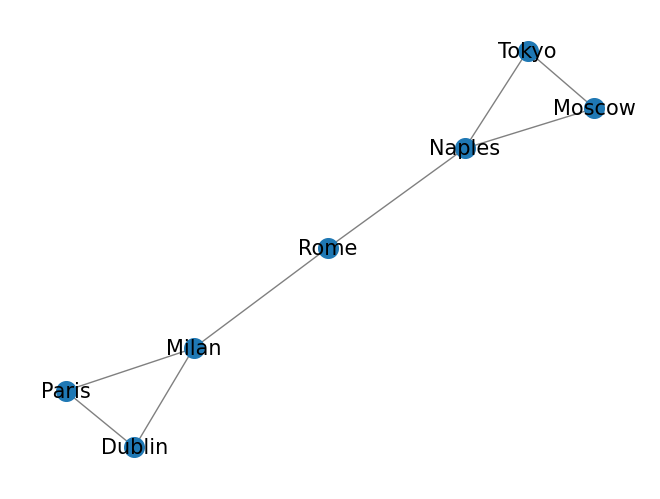

In [ ]:
pos = nx.spring_layout(G, seed = 0)
nx.draw(G, pos, with_labels=True, font_size=15, node_size=200, edge_color='gray')

edge_labels=nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)



In [ ]:
source = 'Dublin' 
target = 'Tokyo' 

path = nx.dijkstra_path(G, source, target)
path

['Dublin', 'Milan', 'Rome', 'Naples', 'Tokyo']

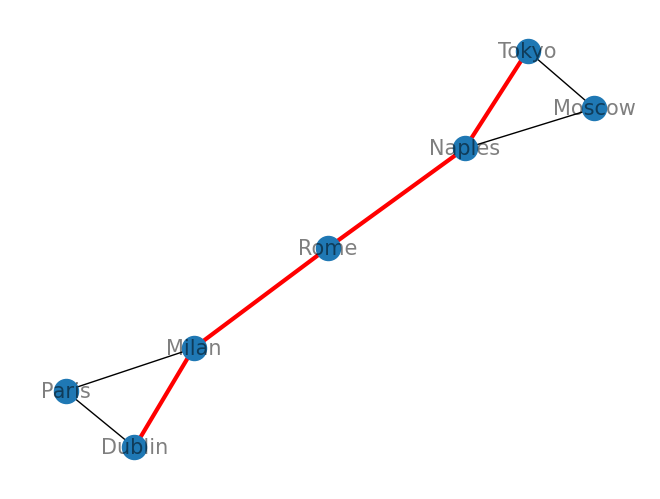

In [ ]:
nx.draw(G, pos)
edgelist = [[path[i], path[i+1]] for i in range(len(path)-1)]
nx.draw_networkx_edges(G, pos, edgelist, edge_color='r', width=3.)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
nx.draw_networkx_labels(G, pos, font_size=15, alpha = 0.5  )
plt.show()

In [ ]:
G.edges(data=True)

EdgeDataView([('Dublin', 'Paris', {}), ('Dublin', 'Milan', {}), ('Paris', 'Milan', {}), ('Milan', 'Rome', {}), ('Rome', 'Naples', {}), ('Naples', 'Moscow', {}), ('Naples', 'Tokyo', {}), ('Moscow', 'Tokyo', {})])

Add some random weights to the graph...

In [ ]:
import random

In [ ]:
for u,v,data in G.edges(data=True):
  G[u][v]['weight'] = random.randint(1,5)

In [ ]:
G.edges(data=True)

EdgeDataView([('Dublin', 'Paris', {'weight': 4}), ('Dublin', 'Milan', {'weight': 1}), ('Paris', 'Milan', {'weight': 4}), ('Milan', 'Rome', {'weight': 4}), ('Rome', 'Naples', {'weight': 3}), ('Naples', 'Moscow', {'weight': 1}), ('Naples', 'Tokyo', {'weight': 4}), ('Moscow', 'Tokyo', {'weight': 1})])

In [ ]:
source = 'Dublin' 
target = 'Tokyo' 

path = nx.dijkstra_path(G, source, target)
path

['Dublin', 'Milan', 'Rome', 'Naples', 'Moscow', 'Tokyo']

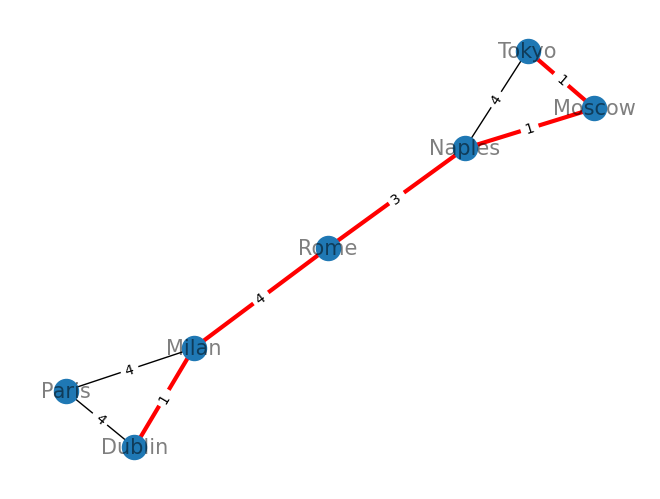

In [ ]:
nx.draw(G, pos)

edgelist = [[path[i], path[i+1]] for i in range(len(path)-1)]
nx.draw_networkx_edges(G, pos, edgelist, edge_color='r', width=3.)

labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G,pos, edge_labels=labels)
nx.draw_networkx_labels(G, pos, font_size=15, alpha = 0.5 )
plt.show()

The **characteristic path length** is defined as the average of all the shortest path lengths between all possible pair of nodes. However, this metric cannot be always defined since it is not possible to compute a path among all the nodes in disconnected graphs. For this reason, network efficiency is also widely used.

In [ ]:
nx.average_shortest_path_length(G)

2.1904761904761907

**Global efficiency** is the average of the inverse shortest path length for all pairs of nodes. 
Such a metric can be seen as a measure of how efficiently information is exchanged across a network.

In [ ]:
nx.global_efficiency(G)

0.611111111111111

**Average local efficiency** is computed in networkx using the following command

In [ ]:
nx.local_efficiency(G)

0.6666666666666667

### Segregation metrics
The clustering coefficient is a measure of how much nodes cluster together. It is defined as the fraction of triangles (complete subgraph of three nodes and three edges) around a node and is equivalent to the fraction of the node's neighbors that are neighbors of each other. 

In [ ]:
nx.average_clustering(G)

0.6666666666666667

The local clustering coefficient is computed in networkx using the following method:

In [ ]:
clustering = nx.clustering(G)
clustering 

{'Dublin': 1.0,
 'Paris': 1.0,
 'Milan': 0.3333333333333333,
 'Rome': 0,
 'Naples': 0.3333333333333333,
 'Moscow': 1.0,
 'Tokyo': 1.0}

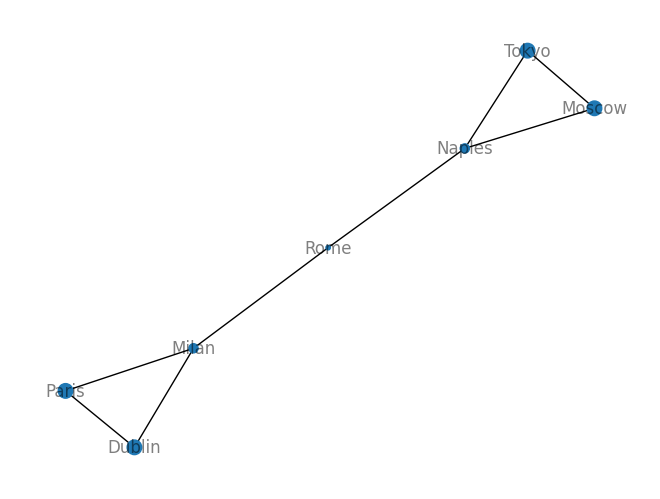

In [ ]:
scalar = [ (n*100)+10 for n in list(clustering.values())]
nx.draw(G, pos,  node_size= scalar )
nx. draw_networkx_labels(G, pos, alpha = 0.5)
plt.show()

### Centrality metrics


One of the most common and simple centrality metrics is the **degree centrality metric**. 

This is directly connected with the degree of a node, measuring the number of incident edges on a certain node.  Intuitively, the more a node is connected to an other node, the more its degree centrality will assume high values

In [ ]:
degree_centrality = nx.degree_centrality(G)
degree_centrality

{'Dublin': 0.3333333333333333,
 'Paris': 0.3333333333333333,
 'Milan': 0.5,
 'Rome': 0.3333333333333333,
 'Naples': 0.5,
 'Moscow': 0.3333333333333333,
 'Tokyo': 0.3333333333333333}

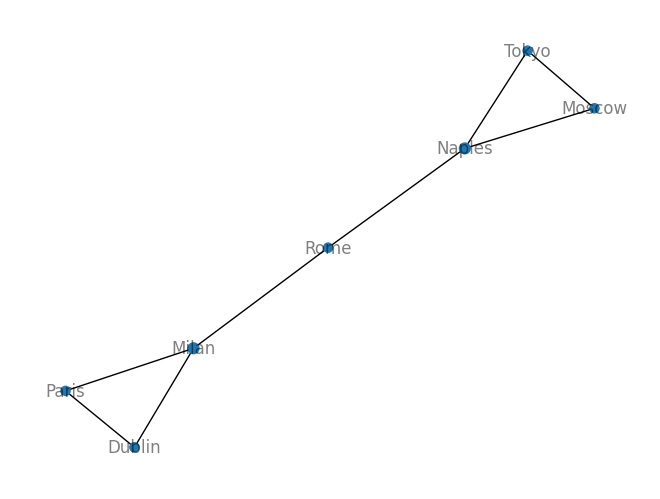

In [ ]:
scalar = [ (n*100)+10 for n in list(degree_centrality.values())]
nx.draw(G, pos,   node_size= scalar )
nx. draw_networkx_labels(G, pos, alpha = 0.5)
plt.show()

The **closeness centrality** metric attempts to quantify how much a node is close (well connected) to other nodes. More formally, it refers to the average distance of a node to all other nodes in the network.

In [ ]:
closeness_centrality = nx.closeness_centrality(G)
closeness_centrality

{'Dublin': 0.4,
 'Paris': 0.4,
 'Milan': 0.5454545454545454,
 'Rome': 0.6,
 'Naples': 0.5454545454545454,
 'Moscow': 0.4,
 'Tokyo': 0.4}

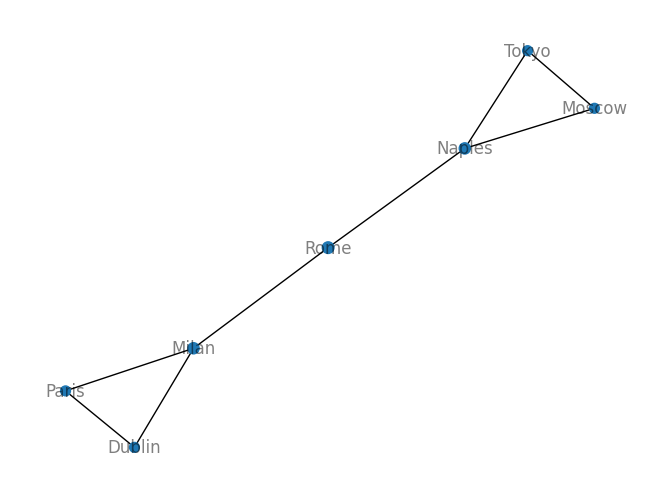

In [ ]:
scalar = [ (n*100)+10 for n in list(closeness_centrality.values())]
nx.draw(G, pos,  node_size= scalar )
nx. draw_networkx_labels(G, pos, alpha = 0.5)
plt.show()

The **betweenness centrality** metric evaluates how much a node acts as a bridge between other nodes. Even if poorly connected, a node can be strategically connected, helping to keep the whole network connected

In [ ]:
betweenness_centrality = nx.betweenness_centrality(G)
betweenness_centrality

{'Dublin': 0.0,
 'Paris': 0.0,
 'Milan': 0.5333333333333333,
 'Rome': 0.6,
 'Naples': 0.5333333333333333,
 'Moscow': 0.0,
 'Tokyo': 0.0}

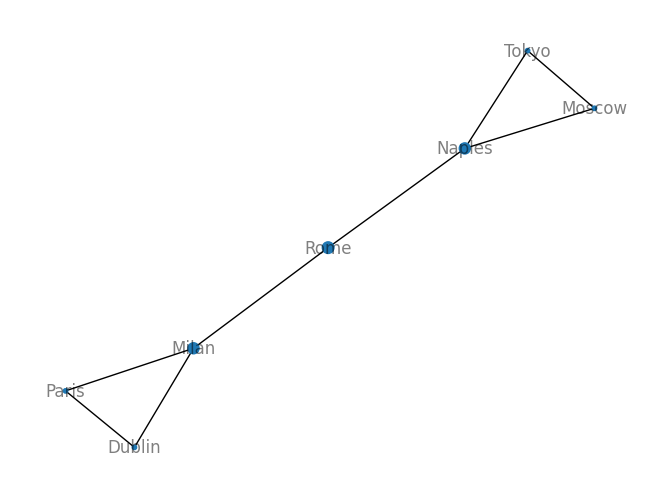

In [ ]:
scalar = [ (n*100)+10 for n in list(betweenness_centrality.values())]
nx.draw(G, pos, node_size= scalar )
nx. draw_networkx_labels(G, pos, alpha = 0.5)
plt.show()

## Graph Generators

You can find many predefined graphs in the networkx reference:
https://networkx.org/documentation/stable/reference/generators.html

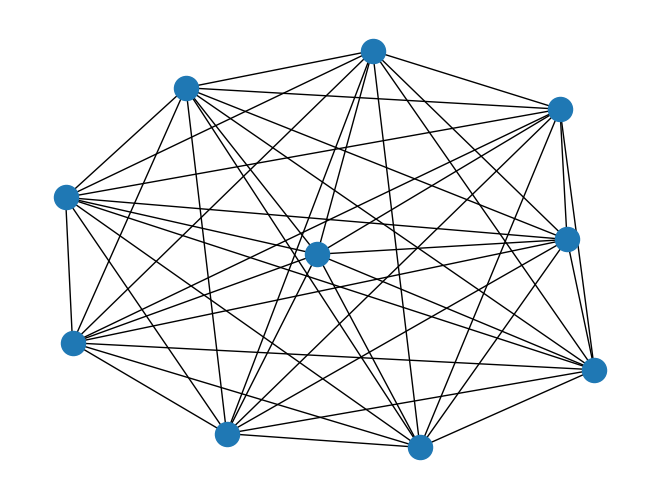

In [ ]:
complete = nx.complete_graph(n=10)
nx.draw(complete)

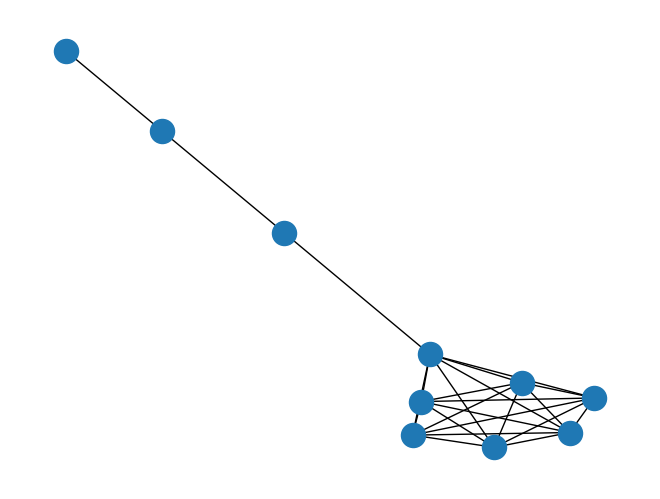

In [ ]:
lollipop = nx.lollipop_graph(m=7, n=3)
nx.draw(lollipop)

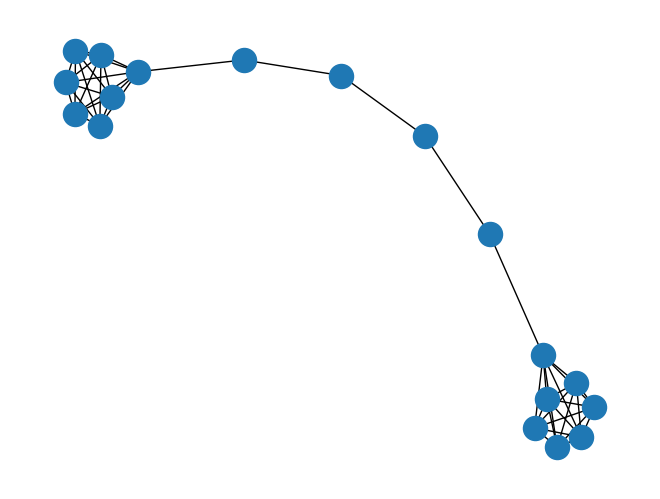

In [ ]:
barbell = nx.barbell_graph(m1=7, m2=4)
nx.draw(barbell)

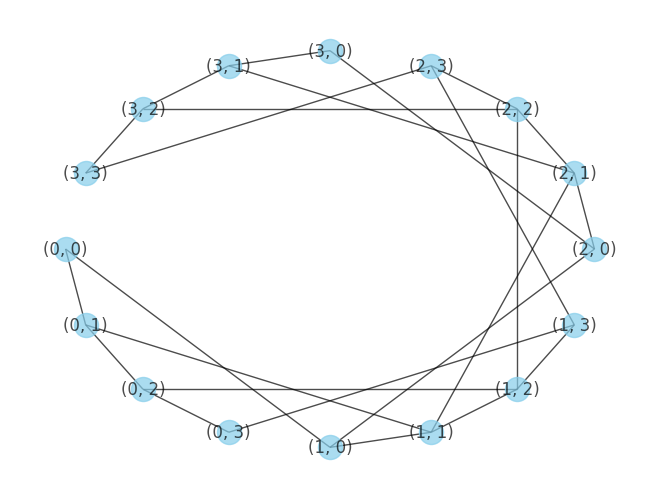

In [ ]:
mesh = nx.grid_2d_graph(4,4)
mesh = nx.Graph.to_undirected(mesh)

# pos = nx.kamada_kawai_layout(mesh)

pos = nx.shell_layout(mesh)

nx.draw(mesh, pos,  with_labels=True,  node_color="skyblue", alpha=0.7)

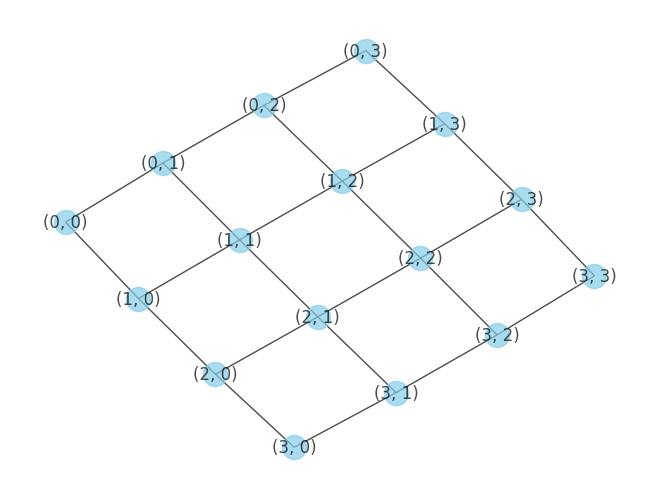

In [ ]:
mesh = nx.grid_2d_graph(4,4)
mesh = nx.Graph.to_undirected(mesh)

pos = nx.kamada_kawai_layout(mesh)

nx.draw(mesh, pos,  with_labels=True,  node_color="skyblue", alpha=0.7)

## Excersice: Les Miserables

https://networkx.org/documentation/stable/reference/generated/networkx.generators.social.les_miserables_graph.html

In [ ]:
G = nx.les_miserables_graph()


1. Draw the graph in a way that you think makes sense

2. Get the weights from the graph

3. Find the degree and betweeness centrality

What can you tell from this metrics? 

Write your answer, here.